In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
f = h5py.File("/data/chuyu/data/20240517_135803/image_bg_all_fish.h5", 'r')

In [170]:
chamber_roi_array = f["chamber_roi_array"]
img_bg_all = f["img_bg_all"]
arena_offset_xy = f["arena_offset_xy"]

In [171]:
which_fish = 2
gray = chamber_roi_array[:,:,which_fish].astype(np.uint8)

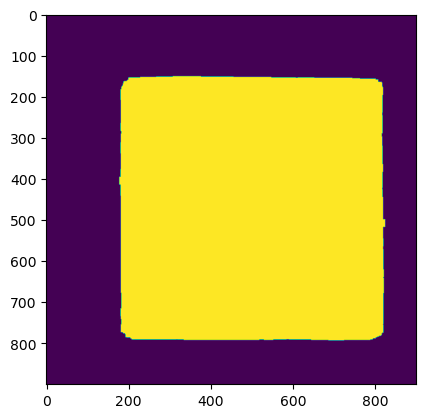

In [172]:
plt.imshow(gray)

In [173]:

cnts = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts[0], key = cv2.contourArea, reverse = True)[:5]

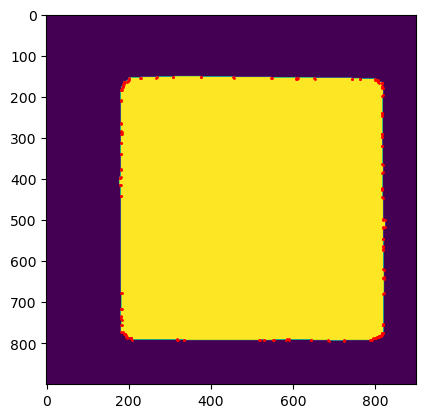

In [174]:
which_contour = 0
contour_x = cnts[which_contour][:,0,0]
contour_y = cnts[which_contour][:,0,1]


plt.imshow(gray)
plt.scatter(contour_x,contour_y, s= 1, color="r")





In [175]:
rect = cv2.approxPolyDP(cnts[which_contour], 60, True).copy().reshape(-1, 2)

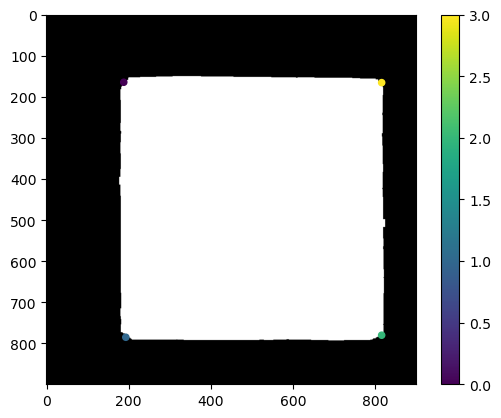

In [176]:
plt.imshow(gray, cmap="gray")

contour_x = rect[:,0]
contour_y = rect[:,1]


plt.scatter(contour_x, contour_y, s= 20, c=np.arange(rect.shape[0]))
plt.colorbar()

In [177]:
roi = np.zeros(gray.shape)

In [178]:
cv2.fillPoly(roi, pts=[rect], color=(255, 0, 0))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

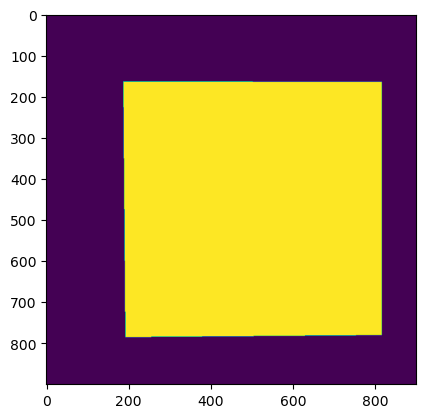

In [179]:
plt.imshow(roi)

In [180]:
np.argsort(rect[:, 0]*rect[:, 1])

array([0, 3, 1, 2])

In [181]:
rect_sort_product = rect[np.argsort(rect[:, 0]*rect[:, 1]), :]

rect_sort = np.copy(rect_sort_product)
if rect_sort_product[1,1]<rect_sort_product[2,1]:
    rect_sort[1,:] = rect_sort_product[2,:]
    rect_sort[2,:] = rect_sort_product[1,:]

In [182]:
rect_sort

array([[188, 164],
       [193, 785],
       [816, 165],
       [816, 780]], dtype=int32)

In [183]:
mid_point_1 = np.mean(rect_sort[0:2,:], axis=0)
mid_point_2 = np.mean(rect_sort[2:,:], axis=0)

In [184]:
mid_point_2

array([816. , 472.5])

In [185]:
roi = np.zeros(gray.shape)

In [186]:
rect_half = np.floor(np.array([mid_point_2, mid_point_1, rect_sort[1,:], rect_sort[3,:]])).astype(np.int32)

In [187]:
rect_half

array([[816, 472],
       [190, 474],
       [193, 785],
       [816, 780]], dtype=int32)

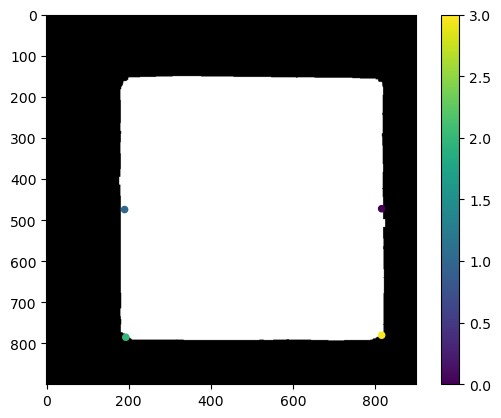

In [192]:
plt.imshow(gray, cmap="gray")

contour_x = rect_half[:,0]
contour_y = rect_half[:,1]


plt.scatter(contour_x, contour_y, s= 20, c=np.arange(rect.shape[0]))
plt.colorbar()

In [190]:
cv2.fillPoly(roi, pts=[rect_half], color=(255, 0, 0))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

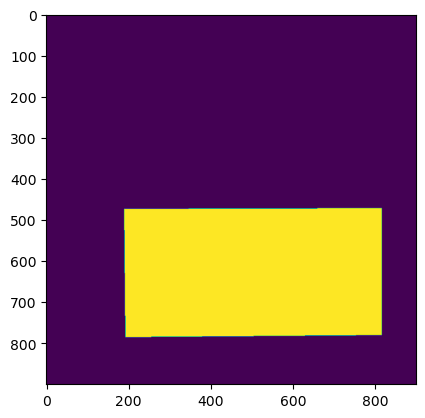

In [189]:
plt.imshow(roi)

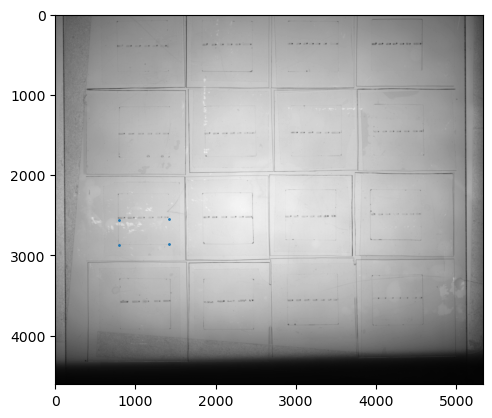

In [156]:
plt.imshow(img_bg_all, cmap="gray")
plt.scatter(rect_half[:,0] + arena_offset_xy[0,which_fish], rect_half[:,1] + arena_offset_xy[1,which_fish], s= 1)

# For all fish

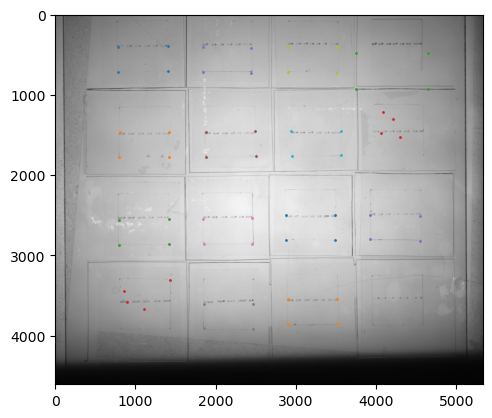

In [161]:
plt.imshow(img_bg_all, cmap="gray")
for which_fish in range(15):
    gray = chamber_roi_array[:,:,which_fish].astype(np.uint8)
    
    cnts = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts[0], key = cv2.contourArea, reverse = True)[:5]
    
    which_contour = 0
    contour_x = cnts[which_contour][:,0,0]
    contour_y = cnts[which_contour][:,0,1]
    
    rect = cv2.approxPolyDP(cnts[which_contour], 60, True).copy().reshape(-1, 2)
    
    
    rect_sort_product = rect[np.argsort(rect[:, 0]*rect[:, 1]), :]
    
    rect_sort = np.copy(rect_sort_product)
    if rect_sort_product[1,1]<rect_sort_product[2,1]:
        rect_sort[1,:] = rect_sort_product[2,:]
        rect_sort[2,:] = rect_sort_product[1,:]
    
    mid_point_1 = np.mean(rect_sort[0:2,:], axis=0)
    mid_point_2 = np.mean(rect_sort[2:,:], axis=0)
    
    roi = np.zeros(gray.shape)
    
    rect_half = np.floor(np.array([mid_point_2, mid_point_1, rect_sort[1,:], rect_sort[3,:]])).astype(np.int32)
    
    cv2.fillPoly(roi, pts=[rect_half], color=(255, 0, 0))
    
    
    
    plt.scatter(rect_half[:,0] + arena_offset_xy[0,which_fish], rect_half[:,1] + arena_offset_xy[1,which_fish], s= 1)

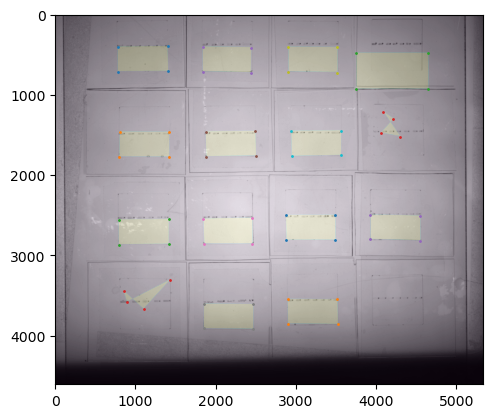

In [169]:
plt.imshow(img_bg_all, cmap="gray")

roi = np.zeros(img_bg_all.shape)
for which_fish in range(15):
    gray = chamber_roi_array[:,:,which_fish].astype(np.uint8)
    
    cnts = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts[0], key = cv2.contourArea, reverse = True)[:5]
    
    which_contour = 0
    contour_x = cnts[which_contour][:,0,0]
    contour_y = cnts[which_contour][:,0,1]
    
    rect = cv2.approxPolyDP(cnts[which_contour], 60, True).copy().reshape(-1, 2)
    
    
    rect_sort_product = rect[np.argsort(rect[:, 0]*rect[:, 1]), :]
    
    rect_sort = np.copy(rect_sort_product)
    if rect_sort_product[1,1]<rect_sort_product[2,1]:
        rect_sort[1,:] = rect_sort_product[2,:]
        rect_sort[2,:] = rect_sort_product[1,:]
    
    mid_point_1 = np.mean(rect_sort[0:2,:], axis=0)
    mid_point_2 = np.mean(rect_sort[2:,:], axis=0)
    
    
    rect_half = np.floor(np.array([mid_point_2, mid_point_1, rect_sort[1,:], rect_sort[3,:]])).astype(np.int32)

    rect_half[:,0] += arena_offset_xy[0,which_fish]
    rect_half[:,1] += arena_offset_xy[1,which_fish]
    
    cv2.fillPoly(roi, pts=[rect_half], color=(255, 0, 0))
    plt.scatter(rect_half[:,0] , rect_half[:,1] , s= 1)
plt.imshow(roi, alpha=0.1)